In [1]:
import collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import forestci as fci


Failed to import duecredit due to No module named 'duecredit'


In [2]:
signal = pd.read_csv("resonances0.txt", delim_whitespace=True)
val_data = pd.read_csv("comp.txt", delim_whitespace=True)

In [3]:
signal.shape, signal.head()

((283, 12),
     Z  El   A   Io      Bn    D0   dD   S0   dS    Gg   dG Com.
 0  20  Ca  40  0.0   8.363  45.0  4.0  2.7  0.7  1500  900  06M
 1  20  Ca  42  0.0   7.933  20.0  5.0  2.5  0.5  1100  200  96I
 2  20  Ca  43  3.5  11.131   1.8  0.3  3.6  0.6   750   40  96I
 3  20  Ca  44  0.0   7.415  24.1  3.2  2.4  0.5  1300  400  96I
 4  21  Sc  45  3.5   8.761   1.3  0.1  4.4  0.6   840  460  96I)

In [4]:
x = signal[['Z','A']]
y = signal[['D0']]
arr_x = x.values.reshape(-1,2)
arr_y = y.values.ravel()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(arr_x, arr_y, test_size=0.2, random_state=11)



In [6]:
rf = RandomForestRegressor(n_estimators=500,max_depth=500,random_state=10,max_features=2)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8692808664786701

In [7]:
test_data = pd.read_csv("test.txt", delim_whitespace=True)
test_data = test_data[['Z','A']]
test_data = test_data.values.reshape(-1,2)
print(test_data)

[[22 44]
 [23 49]
 [25 51]
 [27 55]
 [29 57]
 [29 59]
 [29 60]
 [29 61]
 [29 63]
 [30 62]
 [30 64]
 [31 63]
 [31 65]
 [31 67]
 [33 69]
 [33 71]
 [33 73]
 [39 83]
 [39 87]
 [40 88]]


In [8]:
y_pred = rf.predict(X_test)

In [9]:
rf_err = abs(fci.random_forest_error(rf,X_train,X_test,calibrate=False))

In [10]:
# test_data = pd.read_csv("res_general.txt", delim_whitespace=True)
# test_data = test_data[['Z','A']]

# res = rf.predict(X_test)
# rf_err = abs(fci.random_forest_error(rf,X_train,X_test,calibrate=False))
# print(test_data)

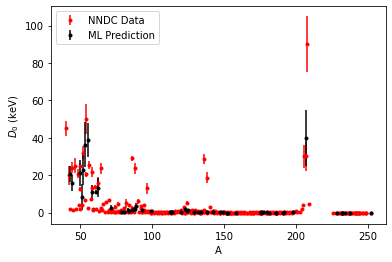

In [11]:
plt.errorbar(signal['A'],signal['D0'],yerr=signal['dD'],fmt='o',markersize=3, color='red',label='NNDC Data')
# plt.fill_between(signal['Z'], y_pred - np.sqrt(rf_err), y_pred + np.sqrt(rf_err), alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF',label='ML Error')
plt.errorbar(X_test[:,1],y_pred,yerr=np.sqrt(rf_err),fmt='o',markersize=3, color='black',label='ML Prediction')
#plt.errorbar(val_data['Z'],val_data['D0'],yerr=val_data['dD'],fmt='o',markersize=3, color='Green',label='Comparison Data')

# plt.xlim(48,52)
# plt.ylim(0,10)

plt.legend()
plt.xlabel("A")
plt.ylabel("$D_0$ (keV)")
plt.show()

In [12]:
print(rf_err)

[  0.62607486   1.27739686   1.04757131   0.27332284   0.53972952
   0.27168222   0.27319184   0.26657981   0.25547267   0.38277058
   0.29544948   0.24199199   0.26475715   0.27745613   0.35812813
   1.03423497   0.25221924  47.03891869   0.67636255   0.68941508
   1.22031263   0.60299846   0.26781308   0.98670611   1.33245233
   0.32606865  47.34376156   0.9228472    0.27966183   0.39322376
   0.29170097  18.05201138   0.28168758   0.65161991   0.27338394
   0.29214192   0.34525715   0.26789043  10.71147804   2.01510217
   0.51226633  83.0939901   17.81261681   0.26709624   0.27504203
   0.2753497   24.62058227   0.26986782   2.21610941   0.26984257
   0.26477481   0.55980974   1.97908962   0.53623523 145.01103232
  64.48210948 224.78422466]


In [13]:
print(y_pred)

[1.8959120e+00 1.1023300e+01 5.9661800e-01 4.2443000e-02 1.2871070e+00
 1.1316440e-01 4.3100200e-02 1.0626400e-02 2.2137600e-02 1.3599320e-01
 5.8458200e-02 5.5600400e-02 1.1779600e-03 3.1269400e-02 7.0513600e-01
 4.3894800e-01 2.6465500e-02 8.4963000e+00 5.3176000e-01 3.8018400e-01
 3.8551800e-01 2.1494160e+00 1.1197400e-02 1.3772400e+00 1.5193600e+00
 1.9904980e-01 2.1167500e+01 1.5817120e+00 1.6392800e-02 8.4884000e-02
 1.0434820e-01 2.0526200e+01 2.0483300e-01 4.9263600e-01 1.4007500e-01
 1.8715000e-02 1.1580900e-01 4.1141800e-03 1.1241600e+01 1.7757418e+00
 1.0754638e+00 3.8985200e+01 1.5907200e+01 6.3801600e-03 5.1575200e-02
 1.2907620e-02 1.3316740e+01 3.5842600e-03 3.4550320e+00 4.8629400e-03
 1.3235200e-03 3.6949400e-01 2.5506080e+00 3.0748640e-01 3.6300800e+01
 2.2549000e+01 3.9733580e+01]


In [14]:
print(X_test)

[[ 38  87]
 [ 28  61]
 [ 36  84]
 [ 72 177]
 [ 52 125]
 [ 70 176]
 [ 74 180]
 [ 93 238]
 [ 77 191]
 [ 48 114]
 [ 62 149]
 [ 78 192]
 [ 92 232]
 [ 74 186]
 [ 43  99]
 [ 54 129]
 [ 72 176]
 [ 23  51]
 [ 36  80]
 [ 60 142]
 [ 54 132]
 [ 38  88]
 [ 76 186]
 [ 36  83]
 [ 41  93]
 [ 60 147]
 [ 24  50]
 [ 36  86]
 [ 73 181]
 [ 56 134]
 [ 48 113]
 [ 20  43]
 [ 80 198]
 [ 56 138]
 [ 50 112]
 [ 64 158]
 [ 50 114]
 [ 90 232]
 [ 28  58]
 [ 51 123]
 [ 52 124]
 [ 25  55]
 [ 20  44]
 [ 90 229]
 [ 71 176]
 [ 64 153]
 [ 28  62]
 [ 98 252]
 [ 39  89]
 [ 63 152]
 [ 92 234]
 [ 36  78]
 [ 31  71]
 [ 50 120]
 [ 24  53]
 [ 24  52]
 [ 82 207]]


In [15]:
with open("data.txt","w") as f:
    # f.write(' Z=  22 A=  46\n')
    # f.write('  U[MeV]  fE1[mb/MeV]\n')
    for i in range(0, len(y_pred)):
        f.write("{0}   {1}   {2}   {3}\n".format(X_test[i,0],X_test[i,1],round(y_pred[i],4),round(np.sqrt(rf_err[i]),4)))

In [16]:
y_pred_test = rf.predict(test_data)
rf_err_test = abs(fci.random_forest_error(rf,X_train,test_data,calibrate=False))

In [17]:
with open("data_test.txt","w") as f:
    # f.write(' Z=  22 A=  46\n')
    # f.write('  U[MeV]  fE1[mb/MeV]\n')
    for i in range(0, len(y_pred_test)):
        f.write("{0}   {1}   {2}   {3}\n".format(test_data[i,0],test_data[i,1],round(y_pred_test[i],4),round(np.sqrt(rf_err_test[i]),4)))

In [18]:
print(test_data)

[[22 44]
 [23 49]
 [25 51]
 [27 55]
 [29 57]
 [29 59]
 [29 60]
 [29 61]
 [29 63]
 [30 62]
 [30 64]
 [31 63]
 [31 65]
 [31 67]
 [33 69]
 [33 71]
 [33 73]
 [39 83]
 [39 87]
 [40 88]]
